# Notebook d'exploration des données

*Ce notebook contient diverses analyses de données réalisée au fur et à mesure du projet.*

In [1]:
import matplotlib.pyplot as plt
from rich import print_json, print
import polars as pl
import pandas as pd
import glob

pl.Config.set_tbl_cols(-1)  # Configure Polars to display all columns

polars.config.Config

## Exploration du dataset initiale pour X

La structure du dataset initiale contenant les données de X/Twitter tel que disponible sur github était :

```
- root
-- part_{i}
--- may_july_chunk_{k}.csv.gz
--- ...
-- ..
```

Il fallait donc pour le traitement, unifier l'échantillon que nous souhaitons traiter.

Cette partie du notebook a donc pour objectif d'avoir une première vue du contenue du jeu de données. Cela permettant par la suite d'effectuer le nettoyage et l'unification des fichiers, cela se retrouve dans `clean.ipynb`.

In [ ]:
# Glob and concat all the dataset in a lazy dataframe
csv_files = glob.glob("origin/part_1/may_july_chunk_*.csv")
lazy_frames = [
    pl.scan_csv(
        file,
        schema_overrides={"in_reply_to_status_id_str": pl.Utf8},
        ignore_errors=True,
    )
    for file in csv_files
]
common_schema = lazy_frames[0].collect_schema()
lazy_frames = [
    frame.with_columns(
        [pl.col(col).cast(dtype) for col, dtype in common_schema.items()]
    )
    for frame in lazy_frames
]
lazy_df = pl.concat(lazy_frames)

# Create a not lazy dataframe that is a sample of n rows
n = 1000  # Change this variable to adjust the sample size
df = lazy_df.collect().sample(n=n)

IndexError: list index out of range

In [ ]:
print("\nDataframe schema:")
schema_dict = {
    key: str(value) for key, value in df.schema.items()
}  # Adapt to dictionnary to rich print
print_json(data=schema_dict)
df.describe()
df.head(5)

Dataframe schema:

{
  "": "Int64",
  "id": "Int64",
  "text": "String",
  "url": "String",
  "epoch": "Float64",
  "media": "String",
  "retweetedTweet": "Boolean",
  "retweetedTweetID": "String",
  "retweetedUserID": "String",
  "id_str": "Int64",
  "lang": "String",
  "rawContent": "String",
  "replyCount": "Float64",
  "retweetCount": "Float64",
  "likeCount": "Float64",
  "quoteCount": "Float64",
  "conversationId": "Float64",
  "conversationIdStr": "Float64",
  "hashtags": "String",
  "mentionedUsers": "String",
  "links": "String",
  "viewCount": "String",
  "quotedTweet": "Boolean",
  "in_reply_to_screen_name": "String",
  "in_reply_to_status_id_str": "String",
  "in_reply_to_user_id_str": "Float64",
  "location": "String",
  "cash_app_handle": "String",
  "user": "String",
  "date": "String",
  "_type": "String",
  "type": "String"
}

,id,text,url,epoch,media,retweetedTweet,retweetedTweetID,retweetedUserID,id_str,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,conversationId,conversationIdStr,hashtags,mentionedUsers,links,viewCount,quotedTweet,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id_str,location,cash_app_handle,user,date,_type,type
i64,i64,str,str,f64,str,bool,str,str,i64,str,str,f64,f64,f64,f64,f64,f64,str,str,str,str,bool,str,str,f64,str,str,str,str,str,str
44990,1800749174708899969,"""@MiaFarrow @1980_nicoletta Nev…","""https://twitter.com/MMike1959/…",1.7182e9,"""[]""",false,null,null,1800749174708899969,"""en""","""@MiaFarrow @1980_nicoletta Nev…",0.0,0.0,0.0,0.0,1.8007e18,1.8007e18,"""[]""","""[{'id_str': '33235771', 'name'…","""[]""","""{'count': '12', 'state': 'Enab…",false,"""MiaFarrow""","""1.8006848112011963e+18""",3.3235771e7,null,null,"""{'id': 1768713592998969344, 'i…","""2024-06-12""",null,"""tweet-"""
28632,1800942759257231725,"""@RickyDoggin MAGA!🙏🇺🇸""","""https://twitter.com/Cann112156…",1.7182e9,"""[]""",false,null,null,1800942759257231725,"""et""","""@RickyDoggin MAGA!🙏🇺🇸""",0.0,0.0,0.0,0.0,1.8004e18,1.8004e18,"""[]""","""[{'id_str': '14945134412346368…","""[]""","""{'state': 'Enabled'}""",false,"""RickyDoggin""","""1.800392519580263e+18""",1.4945e18,null,null,"""{'id': 1755246076763013120, 'i…","""2024-06-12""",null,"""tweet-"""
6110,1800690028961825099,"""@hendopolis The Conservative g…","""https://twitter.com/BeddoeSusa…",1.7182e9,"""[]""",false,null,null,1800690028961825099,"""en""","""@hendopolis The Conservative g…",2.0,0.0,0.0,0.0,1.8006e18,1.8006e18,"""[]""","""[{'id_str': '16692859', 'name'…","""[]""","""{'count': '43', 'state': 'Enab…",false,"""hendopolis""","""1.800643204603134e+18""",1.6692859e7,null,null,"""{'id': 4197091714, 'id_str': '…","""2024-06-12""",null,"""tweet-"""
13065,1801587173033935206,"""@greta Dogs can sense evil. Th…","""https://twitter.com/reammaggie…",1.7184e9,"""[]""",false,null,null,1801587173033935206,"""en""","""@greta Dogs can sense evil. Th…",0.0,0.0,0.0,0.0,1.8016e18,1.8016e18,"""[]""","""[{'id_str': '16031927', 'name'…","""[]""","""{'count': '9', 'state': 'Enabl…",false,"""greta""","""1.801577130494452e+18""",1.6031927e7,null,null,"""{'id': 1437173003314417664, 'i…","""2024-06-14""",null,"""tweet-"""
25200,1801228905438646453,"""@JenC222 Explain how MAGA is r…","""https://twitter.com/DoNotEverC…",1.7183e9,"""[]""",false,null,null,1801228905438646453,"""en""","""@JenC222 Explain how MAGA is r…",0.0,0.0,0.0,0.0,1.8009e18,1.8009e18,"""[]""","""[{'id_str': '49961286', 'name'…","""[]""","""{'count': '4', 'state': 'Enabl…",false,"""JenC222""","""1.801061338749252e+18""",4.9961286e7,null,null,"""{'id': 1484166671929651201, 'i…","""2024-06-13""",null,"""tweet-"""


In [ ]:
# Filter the dataframe to include only the specified columns
filtered_df = df.select(
    [
        "id",
        "rawContent",
        "url",
        "retweetedTweet",
        "lang",
        "replyCount",
        "retweetCount",
        "likeCount",
        "quoteCount",
        "viewCount",
        "quotedTweet",
        "user",
        "date",
    ]
)

print("Filtered dataframe:")
print(filtered_df.head(1))

Filtered dataframe:

shape: (1, 13)
┌─────┬─────┬─────┬────────┬──────┬────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ id  ┆ raw ┆ url ┆ retwee ┆ lang ┆ replyC ┆ retwe ┆ likeC ┆ quote ┆ viewC ┆ quote ┆ user  ┆ date  │
│ --- ┆ Con ┆ --- ┆ tedTwe ┆ ---  ┆ ount   ┆ etCou ┆ ount  ┆ Count ┆ ount  ┆ dTwee ┆ ---   ┆ ---   │
│ i64 ┆ ten ┆ str ┆ et     ┆ str  ┆ ---    ┆ nt    ┆ ---   ┆ ---   ┆ ---   ┆ t     ┆ str   ┆ str   │
│     ┆ t   ┆     ┆ ---    ┆      ┆ f64    ┆ ---   ┆ f64   ┆ f64   ┆ str   ┆ ---   ┆       ┆       │
│     ┆ --- ┆     ┆ bool   ┆      ┆        ┆ f64   ┆       ┆       ┆       ┆ bool  ┆       ┆       │
│     ┆ str ┆     ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
╞═════╪═════╪═════╪════════╪══════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ 180 ┆ @Mi ┆ htt ┆ false  ┆ en   ┆ 0.0    ┆ 0.0   ┆ 0.0   ┆ 0.0   ┆ {'cou ┆ false ┆ {'id' ┆ 2024- │
│ 074 ┆ aFa ┆ ps: ┆        ┆      ┆        ┆       ┆       ┆       ┆ nt':  ┆       ┆ : 176 ┆ 06-12 │
│ 917 ┆ rro ┆ //t ┆        ┆      ┆        ┆       ┆       ┆       ┆ '12', ┆       ┆ 87135 ┆       │
│ 470 ┆ w   ┆ wit ┆        ┆      ┆        ┆       ┆       ┆       ┆ 'stat ┆       ┆ 92998 ┆       │
│ 889 ┆ @19 ┆ ter ┆        ┆      ┆        ┆       ┆       ┆       ┆ e':   ┆       ┆ 96934 ┆       │
│ 996 ┆ 80_ ┆ .co ┆        ┆      ┆        ┆       ┆       ┆       ┆ 'Enab ┆       ┆ 4,    ┆       │
│ 9   ┆ nic ┆ m/M ┆        ┆      ┆        ┆       ┆       ┆       ┆ …     ┆       ┆ 'i…   ┆       │
│     ┆ ole ┆ Mik ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ tta ┆ e19 ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ Nev ┆ 59/ ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ …   ┆ …   ┆        ┆      ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
└─────┴─────┴─────┴────────┴──────┴────────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┘

In [ ]:
# Display the content of the 'viewCount' and 'user' columns for one row in dictionary format
row_index = 0  # Adjust the index to select a specific row
view_count_dict = filtered_df[row_index, "viewCount"]
user_dict = filtered_df[row_index, "user"]

print("ViewCount column for one row as dictionary:")
print_json(data=view_count_dict)

print("\nUser column for one row as dictionary:")
print_json(data=user_dict)

ViewCount column for one row as dictionary:

"{'count': '12', 'state': 'EnabledWithCount'}"

User column for one row as dictionary:

"{'id': 1768713592998969344, 'id_str': '1768713592998969344', 'url': 'https://twitter.com/MikeMiller', 'username': 'MikeMiller', 'rawDescription': '#KamalaHarris 4 President #NavyVet #retired lifelong Democrat', 'created': datetime.datetime(2024, 3, 15, 18, 59, 36, tzinfo=datetime.timezone.utc), 'followersCount': 5719, 'friendsCount': 5049, 'statusesCount': 19667, 'favouritesCount': 15053, 'listedCount': 4, 'mediaCount': 1624, 'location': '', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1768903264110878721/fc6Wz_nx_normal.jpg', 'profileBannerUrl': 'PW', 'protected': 'PW', 'verified': False, 'blue': False, 'blueType': None, 'descriptionLinks': ['PW'], '_type': 'PW'}"

## Ebauche de base de données

[Lien DrawDB](https://drawdb.vercel.app/editor?shareId=e6c18b8ae53063fa1dfa9cc8a849605f)

```sql
CREATE TABLE `x_post` (
	`post_id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`user_id` INTEGER,
	`lang` TEXT(65535),
	`text` TEXT(65535),
	`date` DATE,
	`like_count` INTEGER,
	`reply_count` INTEGER,
	`retweet_count` INTEGER,
	`quote_count` INTEGER,
	PRIMARY KEY(`post_id`)
);


CREATE TABLE `x_user` (
	`user_id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`name` TEXT(65535),
	`bio` TEXT(65535),
	`followers_count` INTEGER,
	`follows_count` INTEGER,
	PRIMARY KEY(`user_id`)
);


CREATE TABLE `bsky_post` (
	`post_id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`user_id` INTEGER,
	`lang` TEXT(65535),
	`text` TEXT(65535),
	`date` DATE,
	`like_count` INTEGER,
	`reply_count` INTEGER,
	`retweet_count` INTEGER,
	`quote_count` INTEGER,
	PRIMARY KEY(`post_id`)
);


CREATE TABLE `bsky_user` (
	`user_id` INTEGER NOT NULL AUTO_INCREMENT UNIQUE,
	`name` TEXT(65535),
	`bio` TEXT(65535),
	`followers_count` INTEGER,
	`follows_count` INTEGER,
	PRIMARY KEY(`user_id`)
);


ALTER TABLE `x_post`
ADD FOREIGN KEY(`post_id`) REFERENCES `x_user`(`user_id`)
ON UPDATE NO ACTION ON DELETE NO ACTION;
ALTER TABLE `bsky_post`
ADD FOREIGN KEY(`post_id`) REFERENCES `bsky_user`(`user_id`)
ON UPDATE NO ACTION ON DELETE NO ACTION;
```

## Distribution temporelle des chunks

/tmp/ipykernel_7506/2106626662.py:2: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  date_counts = df.group_by('date').count()


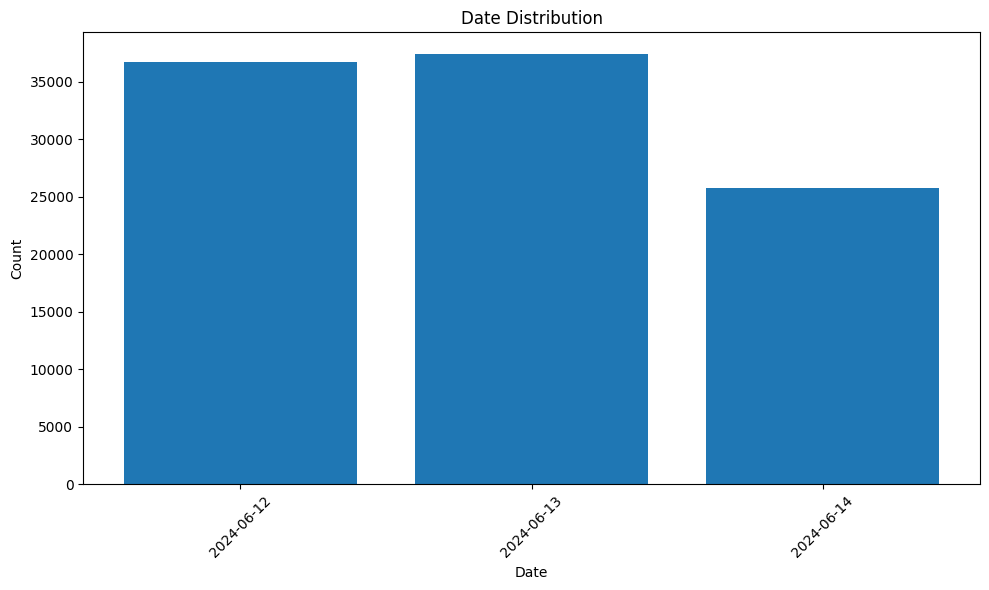

In [ ]:
# Group by 'date' and count occurrences
date_counts = df.group_by("date").count()

# Sort by 'date' to ensure correct order
date_counts = date_counts.sort("date")

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(date_counts["date"], date_counts["count"])
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Date Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Le dataset initiale est formé de centaines de chunks (parties) dispersées de manière non-chronologique entre les 22 dossiers du dataset initial. Le graphique ci-dessous montre que récuperer une seule partie ne permet pas de couvrir la période complète. Il est donc nécessaire de traiter l'intégralité 

# Exploration du dataset raffiné

In [2]:
x_user_dataset = pd.read_parquet("data/x_user.parquet")
x_post_dataset = pd.read_parquet("data/x_post.parquet")
bsky_user_dataset = pd.read_parquet("data/bsky_user.parquet")
bsky_post_dataset = pd.read_parquet("data/bsky_post.parquet")

In [8]:
x_post_dataset.head()

,post_id,user_id,lang,text,date,like_count,reply_count,retweet_count,quote_count
0,1801761052310310976,1181549520385122304,fr,"@benoitm_mtl le pape est pas vite vite ,les ga...",2024-06-14,0,0,0,0
1,1801760646603669666,1521599300656107523,fr,@JdeMontreal Parlons de Biden !!!,2024-06-14,0,0,0,0
2,1801760474058428922,1335615761365217288,fr,@EscadronKoukou Des vrais partisans de Biden 😂😂,2024-06-14,12,1,0,0
3,1801760036869300601,1710461091157843975,fr,@leclerctaillage @rbrtcormier Qui tu propose ?...,2024-06-14,1,1,0,0
4,1801759887405240335,1499768906973593600,fr,@TThierryn @richardhetu Vrai ou pas que c’est ...,2024-06-14,0,0,0,0


In [9]:
bsky_post_dataset.head()

,post_id,user_id,lang,text,date,like_count,reply_count,retweet_count,quote_count
0,at://did:plc:moykytuemx5ubyphffzkfb5x/app.bsky...,did:plc:moykytuemx5ubyphffzkfb5x,fr,Ces gars là ⤵️ se prétendent être les derniers...,2024-06-16 07:48:21.412000+00:00,0,0,0,0
1,at://did:plc:erwnwpwltweuwwpqgjhdv76w/app.bsky...,did:plc:erwnwpwltweuwwpqgjhdv76w,fr,Le parti républicain choisit officiellement le...,2024-07-15 20:00:25+00:00,1,0,0,0
2,at://did:plc:pfvzb6km3kbg22ih5dm6j7rp/app.bsky...,did:plc:pfvzb6km3kbg22ih5dm6j7rp,fr,"Procès de Donald Trump : ambiance tendue, réci...",2024-05-08 10:42:19.006000+00:00,5,0,1,0
3,at://did:plc:smbqo5m74bos64somze6wvs6/app.bsky...,did:plc:smbqo5m74bos64somze6wvs6,fr,"🇺🇸 Qui est Steve Schwarzman, prince de Wall St...",2024-05-27 07:46:29.813000+00:00,1,0,0,0
4,at://did:plc:uhsv3u2ewlchgh3uzzy3bjp2/app.bsky...,did:plc:uhsv3u2ewlchgh3uzzy3bjp2,fr,Élection de Trump : l'immense risque pour les ...,2024-07-23 09:52:49.186000+00:00,0,0,0,0


In [3]:
import plotly.express as px

### Estimation de l'activité sur la durée de l'échantillon

In [4]:
# Create a copy of each dataset and add platform column
x_posts = x_post_dataset.copy()
x_posts['platform'] = 'x'

bsky_posts = bsky_post_dataset.copy()
bsky_posts['platform'] = 'bsky'

# Concatenate the dataframes
merged_posts = pd.concat([x_posts, bsky_posts], ignore_index=True)

# Add activity column
merged_posts['activity'] = (merged_posts['reply_count'] + 
                          merged_posts['retweet_count'] + 
                          merged_posts['quote_count'] + 
                          merged_posts['like_count'])

merged_posts.head()

,post_id,user_id,lang,text,date,like_count,reply_count,retweet_count,quote_count,platform,activity
0,1801761052310310976,1181549520385122304,fr,"@benoitm_mtl le pape est pas vite vite ,les ga...",2024-06-14 00:00:00,0,0,0,0,x,0
1,1801760646603669666,1521599300656107523,fr,@JdeMontreal Parlons de Biden !!!,2024-06-14 00:00:00,0,0,0,0,x,0
2,1801760474058428922,1335615761365217288,fr,@EscadronKoukou Des vrais partisans de Biden 😂😂,2024-06-14 00:00:00,12,1,0,0,x,13
3,1801760036869300601,1710461091157843975,fr,@leclerctaillage @rbrtcormier Qui tu propose ?...,2024-06-14 00:00:00,1,1,0,0,x,2
4,1801759887405240335,1499768906973593600,fr,@TThierryn @richardhetu Vrai ou pas que c’est ...,2024-06-14 00:00:00,0,0,0,0,x,0


In [12]:
# Count total posts per platform
platform_counts = merged_posts['platform'].value_counts()

# Create pie chart using plotly
fig = px.pie(values=platform_counts.values, 
             names=platform_counts.index,
             title='Distribution of Posts by Platform',
             labels={'names': 'Platform', 'values': 'Number of Posts'})

# Update layout with custom text showing percentage and total count
fig.update_traces(texttemplate='%{label}<br>%{percent}<br>(%{value:,.0f} posts)')
fig.show()

Comme on peut le voir, les données récupérées par bsky sont bien moins nombreuses. Cette différence de volume explique pourquoi nous normaliserons souvent les données afin de prendre en compte la différence de données totales par plateformes.

In [37]:
# Convert date to datetime if not already
merged_posts['date'] = pd.to_datetime(merged_posts['date'], utc=True)

# Create month column
merged_posts['month'] = merged_posts['date'].dt.strftime('%B')  # Full month name
merged_posts['month_num'] = merged_posts['date'].dt.month  # For sorting

# Filter for May, June, July only
merged_posts = merged_posts[merged_posts['month_num'].isin([5, 6, 7])]

# Group by month and platform and count posts
monthly_counts = merged_posts.groupby(['month_num', 'month', 'platform']).size().reset_index(name='count')

# Calculate percentage within each platform
monthly_pct = monthly_counts.copy()
total_counts = monthly_counts.groupby('platform')['count'].sum()
monthly_pct['percentage'] = monthly_counts.apply(lambda x: x['count'] / total_counts[x['platform']] * 100, axis=1)

# Create stacked bar chart
fig = px.bar(monthly_pct, 
                      x='month',
                      y='percentage',
                      color='platform',
                      barmode='stack',
                      title='Monthly Post Distribution by Platform (Normalized)',
                      labels={'month': 'Month', 
                                   'percentage': 'Percentage of Posts',
                                   'platform': 'Platform'},
                      category_orders={'month': ['May', 'June', 'July']})

fig.show()

In [38]:
# Create stacked bar chart for activity distribution
monthly_activity = merged_posts.groupby(['month_num', 'month', 'platform'])['activity'].sum().reset_index()

# Calculate percentage within each platform
total_activity = monthly_activity.groupby('platform')['activity'].sum()
monthly_activity['percentage'] = monthly_activity.apply(lambda x: x['activity'] / total_activity[x['platform']] * 100, axis=1)

# Create stacked bar chart
fig = px.bar(monthly_activity,
             x='month', 
             y='percentage',
             color='platform',
             barmode='stack',
             title='Monthly Activity Distribution by Platform (Normalized)',
             labels={'month': 'Month',
                    'percentage': 'Percentage of Activity', 
                    'platform': 'Platform'},
             category_orders={'month': ['May', 'June', 'July']})

fig.show()

Ce graphique, et le graphique encore au-dessus permettent de voir le plus simplement la distribution des données au cours du temps. On observe ainsi directement que juillet représente seul plus de la moitié de l'activité, et ce pour les deux plateformes.

Le deuxième graphique, qui se base sur *l'activité*, c'est à dire la somme des différentes interactions (like, retweet,...) pour chaque posts.

In [39]:
# Calculate week numbers from the dates
merged_posts['week_num'] = merged_posts['date'].dt.isocalendar().week

# Get the first day of each week for x-axis labels
weekly_dates = merged_posts.groupby('week_num')['date'].min().dt.strftime('%d/%m')

# Calculate weekly activity by platform
weekly_activity = merged_posts.groupby(['week_num', 'platform']).agg({
    'activity': 'sum',
    'post_id': 'count'
}).reset_index()

# Calculate percentage within each platform
weekly_activity['normalized_activity'] = weekly_activity.apply(
    lambda x: (x['activity'] / total_activity[x['platform']]) * 100, 
    axis=1
)

# Create stacked bar chart
fig = px.bar(weekly_activity, 
             x='week_num', 
             y='normalized_activity',
             color='platform',
             barmode='stack',
             title='Weekly Activity Distribution by Platform (Normalized across all months)',
             labels={
                 'week_num': 'Week Starting',
                 'normalized_activity': 'Normalized Activity (%)',
                 'platform': 'Platform'
             })

# Update x-axis to show dates instead of week numbers
fig.update_xaxes(
    tickmode='array',
    tickvals=list(weekly_dates.index),
    ticktext=list(weekly_dates.values)
)

fig.show()


Ce graphique montre l'activité par semaine en pourcentage de l'activité totale, et ce pour chacune des plateformes. On peut noter plusieurs choses :
- Certaines semaines comportent particulièrement peu de données provenant de X, comme celle du 24/06. Une analyse plus fine des données explique cela par des défauts du dataset, celui-ci comportant quelques jours de trous.
- Malgré cela, on observe très clairement un pic important aux semaines du 08/07 et 15/07. On verra par la suite que ce pic s'explique par la tentative d'assassinat qui a eu lieu contre Donal Trump le 14 juillet 2024.
- Enfin, on observe aussi un pic plus bas à la semaine du 10/06. Les données étant françaises, on peut faire l'hypothèse que ce pic serait lié à la dissolution de l'Assemblée Nationale. Une période d'élections étant propices à évoquer des sujets liés aux éléctions américaines.

### Analyse simple de sentiments

In [44]:
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyzer = SentimentIntensityAnalyzer()

phrase = "Biden ne devrait pas être président"
phrase2 = "Harris serait une excellente présidente, mais pas Trump"

score = sentimentAnalyzer.polarity_scores_max(phrase)
print(score)

score2 = sentimentAnalyzer.polarity_scores_max(phrase2)
print(score2)


{
    'neg': 0.0,
    'neu': 0.806,
    'pos': 0.194,
    'compound': 0.0516,
    'details': {'Biden/bien': 0.2, 'ne': 0, 'devrait': 0, 'pas': 0, 'être': 0, 'président': 0}
}

{
    'neg': 0.0,
    'neu': 0.749,
    'pos': 0.251,
    'compound': 0.3291,
    'details': {
        'Harris': 0.0,
        'serait': 0,
        'une': 0,
        'excellente/excellent': 1.35,
        'présidente': 0,
        'mais': 0,
        'pas': 0,
        'Trump': 0
    }
}

L'algorithme utilisé ici est Vader. Conçu pour l'analyse est un modèle efficient en terme de calcul et qui a été conçu spécifiquement pour les commentaires et contenus textuels courts sur Internet. Il se fond sur la grammaire et l'association de mots à leurs valences respectives.

Pour s'adapter à nos données françaises, une adaptation française du modèle a été utilisée. Disponible sous licence MIT sur [Github](https://github.com/thomas7lieues/vader_FR). Cette méthode est cependant limitée pour analyser des discours complexes, incomplets ou contenant de l'ironie.


*Hutto, C., & Gilbert, E. (2014). VADER: A Parsimonious Rule-Based Model for Sentiment Analysis of Social Media Text. Proceedings of the International AAAI Conference on Web and Social Media, 8(1), 216-225. [https://doi.org/10.1609/icwsm.v8i1.14550](https://doi.org/10.1609/icwsm.v8i1.14550)*

In [6]:
import numpy as np

# Convert date to datetime if not already
merged_posts['date'] = pd.to_datetime(merged_posts['date'], utc=True)

# Create month column and day column
merged_posts['month'] = merged_posts['date'].dt.month
merged_posts['day'] = merged_posts['date'].dt.day  # Extract day of month

# Filter for July only
july_posts = merged_posts[merged_posts['month'] == 7]

# Count posts by platform for July
july_counts = july_posts['platform'].value_counts()
bsky_july_count = july_counts.get('bsky', 0)

# Create balanced dataset with equal samples from each platform
balanced_dataset = []

# For each platform, take a sample equal to bsky_july_count
for platform in july_posts['platform'].unique():
    platform_posts = july_posts[july_posts['platform'] == platform]
    
    # If this platform has more posts than bsky in July, take random sample
    if len(platform_posts) > bsky_july_count:
        platform_sample = platform_posts.sample(n=bsky_july_count, random_state=42)
    else:
        platform_sample = platform_posts  # Take all posts if fewer than bsky_july_count
        
    balanced_dataset.append(platform_sample)

# Combine samples
balanced_july = pd.concat(balanced_dataset, ignore_index=True)

# Add political affiliation column
def get_political_mention(text):
    text_lower = str(text).lower()
    if 'trump' in text_lower or "vance" in text_lower:
        return 'republican'
    elif 'biden' in text_lower or 'harris' in text_lower:
        return 'democrat'
    else:
        return 'other'

balanced_july['political_mention'] = balanced_july['text'].apply(get_political_mention)

# Create a dataframe with text and day columns included for analysis
political_mentions_by_day = balanced_july[['platform', 'political_mention', 'text', 'day']]

# Show some example posts for each political mention type
print("Sample posts by political mention type:")
for mention in ['republican', 'democrat', 'other']:
    sample_posts = political_mentions_by_day[political_mentions_by_day['political_mention'] == mention].head(2)
    print(f"\n{mention.upper()} MENTIONS:")
    for i, row in sample_posts.iterrows():
        print(f"Platform: {row['platform']}, Day: {row['day']}")
        print(f"Text: {row['text'][:100]}..." if len(row['text']) > 100 else f"Text: {row['text']}")
        print("-" * 80)

# Show distribution of political mentions by platform
political_counts = balanced_july.groupby(['platform', 'political_mention']).size().reset_index(name='count')
print("\nPolitical mentions by platform:")
print(political_counts)

# Distribution by day and platform 
political_day_counts = balanced_july.groupby(['day', 'platform', 'political_mention']).size().reset_index(name='count')
print("\nTop 10 days with most political mentions:")
print(political_day_counts.sort_values('count', ascending=False).head(10))

# Print post counts for each platform in the balanced dataset
platform_counts = balanced_july['platform'].value_counts()
print("\nNumber of posts per platform in the balanced dataset:")
print(platform_counts)

# Create a bar chart to visualize platform distribution
fig = px.bar(
    x=platform_counts.index,
    y=platform_counts.values,
    title='Number of Posts by Platform in Balanced Dataset',
    labels={'x': 'Platform', 'y': 'Number of Posts'},
    color=platform_counts.index,
    text=platform_counts.values
)

# Improve layout
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Platform',
    yaxis_title='Count',
    yaxis=dict(rangemode='nonnegative'),
    showlegend=False
)

fig.show()

# Create a stacked bar chart for political mentions by day
daily_mentions = balanced_july.groupby(['day', 'political_mention']).size().reset_index(name='count')
daily_mentions_wide = daily_mentions.pivot(index='day', columns='political_mention', values='count').fillna(0)

fig2 = px.bar(
    daily_mentions_wide,
    title='Political Mentions by Day in July',
    labels={'value': 'Number of Posts', 'day': 'Day of Month'},
    barmode='stack'
)

fig2.update_layout(
    xaxis_title='Day of July',
    yaxis_title='Number of Posts',
    legend_title='Political Mention'
)

fig2.show()

Sample posts by political mention type:

REPUBLICAN MENTIONS:

Platform: x, Day: 16

Text: #USA #Trump2024 A l’instant : les services secrets américains ont renforcé leur sécurité après avoir...

--------------------------------------------------------------------------------

Platform: x, Day: 14

Text: Donald Trump visé par une “tentative d’assassinat” : deux morts, l’ex-Président en sang… panique en ...

--------------------------------------------------------------------------------

DEMOCRAT MENTIONS:

Platform: x, Day: 5

Text: Présidentielle américaine : l'héritière Disney menace de bloquer ses dons au Parti démocrate si Joe ...

--------------------------------------------------------------------------------

Platform: x, Day: 21

Text: @us_peek Franchement je m’attendais à un effondrement plus profond pour Biden @us_peek ! Quels est l...

--------------------------------------------------------------------------------

OTHER MENTIONS:

Platform: x, Day: 20

Text: VOTE.  

@GOP #GOP #maga #republicans @TheDemocrats @TheDemCoalition #democrats #Election2024 https:...

--------------------------------------------------------------------------------

Platform: x, Day: 24

Text: @softlydumbb BAUTI CON BOFFE X KICK

--------------------------------------------------------------------------------

Political mentions by platform:

platform political_mention  count
0     bsky          democrat    952
1     bsky             other    727
2     bsky        republican   1809
3        x          democrat   1549
4        x             other    516
5        x        republican   1423

Top 10 days with most political mentions:

day platform political_mention  count
83    14        x        republican    325
80    14     bsky        republican    305
123   21        x          democrat    263
86    15     bsky        republican    196
126   22     bsky          democrat    185
89    15        x        republican    183
120   21     bsky          democrat    169
69    12        x          democrat    153
95    16        x        republican    141
92    16     bsky        republican    124

Number of posts per platform in the balanced dataset:

platform
x       3488
bsky    3488
Name: count, dtype: int64

Avec cette vue des données concentrée sur juillet, on voit clairement : premièrement le pic du 14 juillet qui concerne majoritairement Trump et est lié à la tentative d'assassinat dont il a été victime ce jour, puis un second pic le 21 juillet, le jour de l'annonce de Joe Biden de se retirer après son mandat, laissant la voie à Kamala Harris pour la campagne à venir.

In [ ]:
political_mentions_by_day.to_parquet("data/temp/political_mentions_with_text.parquet")

In [7]:
from tqdm import tqdm
import matplotlib.pyplot as plt

# Read the saved dataframe (if you're executing in a new session)
# Uncomment this if needed
# political_mentions_by_day = pd.read_parquet("data/political_mentions_with_text.parquet")

# Apply sentiment analysis to political mentions
def get_sentiment_score(text):
    try:
        score = sentimentAnalyzer.polarity_scores_max(text)
        return score['compound']
    except:
        return 0

# Calculate sentiments with progress bar
tqdm.pandas(desc="Analyzing political mentions sentiment")
political_mentions_by_day['sentiment_score'] = political_mentions_by_day['text'].progress_apply(get_sentiment_score)
political_mentions_by_day.to_parquet("data/political_mentions_with_sentiment.parquet")
# Create a grouped analysis by platform and political mention
sentiment_by_politics = political_mentions_by_day.groupby(['platform', 'political_mention'])['sentiment_score'].agg(['mean', 'count']).reset_index()
sentiment_by_politics.columns = ['platform', 'political_mention', 'avg_sentiment', 'count']

# Print the results
print("Average sentiment by platform and political mention:")
print(sentiment_by_politics)

# Create a bar plot of average sentiment by platform and political mention
fig = px.bar(
    sentiment_by_politics,
    x='political_mention',
    y='avg_sentiment',
    color='platform',
    barmode='group',
    title='Average Sentiment by Platform and Political Mention',
    labels={
        'political_mention': 'Political Mention',
        'avg_sentiment': 'Average Sentiment (-1 to 1)',
        'platform': 'Platform'
    },
    text='count'
)

# Improve layout
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Political Mention',
    yaxis_title='Average Sentiment Score',
    yaxis=dict(zeroline=True),
    yaxis_range=[-1, 1]  # Set range to full sentiment scale
)

fig.show()

# Create a scatterplot showing day vs sentiment colored by political mention
fig2 = px.scatter(
    political_mentions_by_day,
    x='day',
    y='sentiment_score',
    color='political_mention',
    facet_col='platform',
    opacity=0.7,
    title='Sentiment Distribution by Day, Platform and Political Mention',
    labels={
        'day': 'Day in July',
        'sentiment_score': 'Sentiment Score (-1 to 1)',
        'political_mention': 'Political Mention'
    },
    category_orders={"platform": ["x", "bsky"]}
)

fig2.update_layout(
    xaxis_title='Day of July',
    yaxis_title='Sentiment Score'
)

fig2.show()

Analyzing political mentions sentiment: 100%|██████████| 6976/6976 [2:23:04<00:00,  1.23s/it]  
/tmp/ipykernel_204330/4010272256.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Average sentiment by platform and political mention:

platform political_mention  avg_sentiment  count
0     bsky          democrat       0.075813    952
1     bsky             other       0.060097    727
2     bsky        republican      -0.029333   1809
3        x          democrat       0.059842   1549
4        x             other       0.004131    516
5        x        republican      -0.025020   1423

Pour ne pas avoir a calculer les sentiments, utiliser la cellule ci-dessous pour charger le résultat directement.

In [ ]:
sentiment_df = pd.read_parquet("data/temp/political_mentions_with_sentiment.parquet")
sentiment_df['sentiment_score'].describe()

count    6976.000000
mean        0.017492
std         0.528057
min        -0.991500
25%        -0.437400
50%         0.000000
75%         0.474100
max         0.983700
Name: sentiment_score, dtype: float64

In [20]:
import os
import openai
from bertopic.representation import OpenAI
from bertopic import BERTopic
from tqdm import tqdm
import plotly.graph_objects as go

# Get a sample of 100 posts from merged_posts
sample_posts = sentiment_df

# Create OpenAI client with OpenRouter
client = openai.OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=os.getenv("OPENROUTER_API_KEY")
)

# Initialize BERTopic with OpenAI representation
representation_model = OpenAI(client, model="openai/gpt-4.1-nano", chat=True)
topic_model = BERTopic(representation_model=representation_model)

# Get texts from sample posts
documents = sample_posts['text'].tolist()
# Fit the model and transform the documents with progress bar
with tqdm(total=2, desc='BERTopic steps') as pbar:
    # Fit step
    topic_model.fit(documents)
    pbar.update(1)
    
    # Transform step
    topics, _ = topic_model.transform(documents)
    pbar.update(1)

# Add topics to the sentiment_df DataFrame
sentiment_df['topic'] = topics

# Visualize topics
# Get topics info
topic_info = topic_model.get_topic_info()

# Create bar chart of topic sizes
fig = px.bar(
    topic_info, 
    x='Topic', 
    y='Count',
    title='Topic Distribution',
    labels={'Count': 'Number of Documents', 'Topic': 'Topic ID'},
    color='Topic'
)

# Update layout
fig.update_layout(
    xaxis_title='Topic ID',
    yaxis_title='Number of Documents',
    showlegend=False
)

fig.show()

# Get topic terms and create dataframe
topic_terms = {}
for topic_id in topic_info['Topic'].unique(): # Renamed 'topic' to 'topic_id' to avoid conflict if run in a context where 'topic' variable from cell 23 might exist
    if topic_id != -1:  # Skip outlier topic
        name = topic_info[topic_info['Topic'] == topic_id]['Name'].values[0]
        topic_terms[f"Topic {topic_id}"] = name
# Create table visualization
topic_df = pd.DataFrame.from_dict(topic_terms, orient='index', columns=['Topic Name'])

fig2 = go.Figure(data=[go.Table(
    header=dict(values=['Topic ID', 'Topic Name'], # Using 'Topic ID' for the index column header
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[topic_df.index.tolist(), topic_df['Topic Name'].tolist()],
               fill_color='lavender',
               align='left'))
])
fig2.update_layout(title_text='Topic Names', height=400)
fig2.show()



BERTopic steps: 100%|██████████| 2/2 [03:23<00:00, 101.81s/it]


De même pour les topics, le dossier data contient déjà une version de ce DataFrame

In [ ]:
sentiment_df.to_parquet("data/temp/political_mentions_with_sentiment_and_topics.parquet")

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'sentiment_df' and 'topic_info' are already loaded and available
# from the previous cells.

# Merge sentiment_df with topic_info to get topic names
# topic_info has 'Topic' (ID) and 'Name' (the descriptive name of the topic)
# sentiment_df has 'topic' (ID)

# Rename 'Topic' in topic_info to 'topic' for a clean merge, and 'Name' to 'topic_name'
topic_info_renamed = topic_info.rename(columns={"Topic": "topic", "Name": "topic_name"})

# Perform the merge
# We select only the 'topic' and 'topic_name' columns from topic_info_renamed to avoid duplicate columns
plot_data_df = pd.merge(sentiment_df, topic_info_renamed[['topic', 'topic_name']], on='topic', how='left')

# BERTopic assigns -1 to outlier documents. The topic_info dataframe already includes a name for topic -1.
# If 'topic_name' is NaN for any reason (e.g. topics not in topic_info), fill it.
plot_data_df['topic_name'] = plot_data_df['topic_name'].fillna('Undefined Topic')

# Group data to calculate average sentiment and count for each path in the hierarchy
grouped_data = plot_data_df.groupby(['platform', 'political_mention', 'topic_name']).agg(
    avg_sentiment=('sentiment_score', 'mean'),
    count=('sentiment_score', 'count')
).reset_index()

# Create the sunburst plot
fig_sunburst = px.sunburst(
    grouped_data,
    path=['platform', 'political_mention', 'topic_name'],
    values='count',
    color='avg_sentiment',
    color_continuous_scale=px.colors.diverging.RdBu,  # Red-Blue diverging scale for sentiment
    color_continuous_midpoint=0,  # Center the color scale at neutral sentiment (0)
    title='Distribution of Topics by Platform and Political Mention, Colored by Average Sentiment',
    hover_data={'avg_sentiment':':.2f'} # Format hover data for average sentiment
)

# Make the plot bigger and adjust margins
fig_sunburst.update_layout(
    margin=dict(t=50, l=20, r=20, b=20),
    width=1000,  # Set the width of the plot
    height=800  # Set the height of the plot
)

fig_sunburst.show()

# Export the plot to an HTML file
output_file_path = "sunburst_plot_topics_sentiment.html"
fig_sunburst.write_html(output_file_path)
print(f"Sunburst plot exported to: {output_file_path}")

Sunburst plot exported to: sunburst_plot_topics_sentiment.html

Cartographie des sujets évoqués, ainsi que leurs proportions. Une fouille manuelle des données explique la large taille des sujets 0 et 1 à ce qu'il regroupe beaucoup de post publiés par des médias ou qui relate simplement des titres d'articles descriptifs.

In [34]:
import plotly.express as px

# Create a bar plot of average sentiment by platform and political mention
# This is similar to a plot in CELL 30, but ensures it uses the correct dataframe
# and can be customized if needed.

fig_sentiment_distribution = px.bar(
    sentiment_by_politics,
    x='political_mention',
    y='avg_sentiment',
    color='platform',
    barmode='group',  # Group bars by platform for each political mention
    title='Distribution of Average Sentiment by Political Mention and Platform',
    labels={
        'political_mention': 'Political Mention',
        'avg_sentiment': 'Average Sentiment Score (-1 to 1)',
        'platform': 'Platform'
    },
    text='count',  # Display the count of posts on top of each bar
    height=600  # Increase height for better readability
)

# Improve layout
fig_sentiment_distribution.update_traces(
    textposition='outside',  # Show text (count) outside the bars
    textfont_size=10
)
fig_sentiment_distribution.update_layout(
    xaxis_title='Political Mention',
    yaxis_title='Average Sentiment Score',
    yaxis=dict(
        zeroline=True,  # Show a line at y=0
        zerolinewidth=2,
        zerolinecolor='Black'
    ),
    yaxis_range=[-0.2, 0.2],  # Adjust y-axis range to zoom in on sentiment differences if they are small
                               # or use [-1, 1] for the full sentiment scale.
                               # Based on previous plot in cell 30, sentiments are mostly between -0.1 and 0.1
    legend_title_text='Platform',
    title_x=0.5 # Center the title
)

fig_sentiment_distribution.show()

On remarque que la plateforme influence grandement le sentiment moyen par affiliation. Ici, les posts contenant "Harris" ou "Biden" ont un sentiment moyen plus positif sur Bluesky que X. Tandis qu'à l'inverse le sentiment moyen est plus négatif pour les républicains sur Bluesky que sur X. Mais la plus grande différence reste les autres mentions (cest-à-dire ne contenant ni "Harris" ni "Biden" ni "Trump"), se retrouve surtout sur Bluesky.